In [1]:
import pandas as pd
import os
import json
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

# 查看数据的基本组织格式 

In [2]:
data_dir = '../data/'
base_names = ['bytecup.corpus.train.'+str(i) + '.txt' for i in range(9)]
# training_dataframe = [pd.read_json(os.path.join(data_dir, base_names[i]), lines=True) for i in range(9)]
# training_dataframe = pd.concat(training_dataframe)

In [5]:
# we will create a test file for the following things.
test_data = pd.read_json(os.path.join(data_dir, base_names[0]), lines=True)
display(test_data.head())

,content,id,title
0,This was the year that felt like 50 years. We ...,1,21 Stories Our Readers Loved in 2017
1,Gary Vaynerchuk once told a 20 year old Taylor...,2,What To Do After Graduating College
2,"On this episode of Recode Decode, hosted by Ka...",3,Full transcript: Former Groupon CEO Andrew Mas...
3,Today we are going to talk about the Albigensi...,4,The Albigensian Crusade And The Black Mass
4,IntroductionThe more you want to impact the re...,5,The Surprising Secret To Changing The World


In [10]:
test_data= test_data[['id', 'content', 'title']]
display(test_data.head())
test_data.to_csv('test_data.csv', index=False)

,id,content,title
0,1,This was the year that felt like 50 years. We ...,21 Stories Our Readers Loved in 2017
1,2,Gary Vaynerchuk once told a 20 year old Taylor...,What To Do After Graduating College
2,3,"On this episode of Recode Decode, hosted by Ka...",Full transcript: Former Groupon CEO Andrew Mas...
3,4,Today we are going to talk about the Albigensi...,The Albigensian Crusade And The Black Mass
4,5,IntroductionThe more you want to impact the re...,The Surprising Secret To Changing The World


In [3]:
len(training_dataframe)
# we will check the passag length and the title length, this 
# will be the most fundamental features.

def vocab_length(item):
    new_item = item.split(' ')
    return len(new_item)
training_dataframe['title_length'] = training_dataframe.title.apply(vocab_length)
training_dataframe['content_length'] = training_dataframe.content.apply(vocab_length)

## EDA 第一部分，查看文章的长度和标题的长度

,content,id,title,title_length,content_length
0,This was the year that felt like 50 years. We ...,1,21 Stories Our Readers Loved in 2017,7,4142
1,Gary Vaynerchuk once told a 20 year old Taylor...,2,What To Do After Graduating College,6,2054
2,"On this episode of Recode Decode, hosted by Ka...",3,Full transcript: Former Groupon CEO Andrew Mas...,10,11679
3,Today we are going to talk about the Albigensi...,4,The Albigensian Crusade And The Black Mass,7,992
4,IntroductionThe more you want to impact the re...,5,The Surprising Secret To Changing The World,7,5153


556.9957582352611

449.0

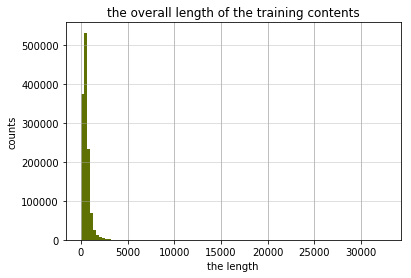

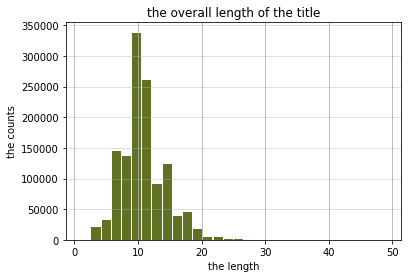

In [4]:
display(training_dataframe.head())
training_dataframe.content_length.plot.hist(grid=True, bins=100, rwidth = 0.9, 
                                           color = '#607103')
plt.title('the overall length of the training contents')
plt.xlabel('the length')
plt.ylabel('counts')
plt.grid(axis='y', alpha = 0.5)

plt.figure()
training_dataframe.title_length.plot.hist(grid=True, bins=30, rwidth=0.9, color = "#607123")
plt.title("the overall length of the title")
plt.xlabel("the length")
plt.ylabel("the counts")
plt.grid(axis='y', alpha=0.5)
display(training_dataframe.content_length.mean())
display(training_dataframe.content_length.median())

In [5]:
list(training_dataframe.title)[2]

'Full transcript: Former Groupon CEO Andrew Mason on Recode Decode'

In [6]:
data_result = training_dataframe.to_csv('training_data.csv', encoding='utf-8')

*1 大部分的文章都算是比较长的, 平均情况是大约为3000个单词，但是标题都是差不多是120个以内的。